# 771768 - Introduction to Programming for Artificial Intelligence and Data Science Customer Data Pre-processing Assignment

# Student Name: Itunuoluwa Abidoye

# Student Number: 202136265

# Data Processing:
# Exercise 1

Ex 1. Read in the provided ACW Data using the CSV library.

# Logic: 

Since I will be reading more than 1 file I am writing a function so I can easily read files also using my error handler

In [1]:
# Creating a function to open files and handle errors

import csv
import json

def csvReader(csv_path):
    
    csv_data = [] # empty list to hold my csv data
    
    # my error handling and my file opening
    try:
        with open(csv_path, mode = 'r') as csv_file:
            csv_reader = csv.reader( csv_file, delimiter= ',' )
            #print("File found!")
            for line in csv_reader:
                csv_data.append(line)
    except FileNotFoundError as not_found:
        print(f"The file at path '{csv_path}' could not be found.")
    except IOError as opening_error:
        print(f"An error occurred while trying to open the file: {opening_error}")
    except Exception as exception:
        print(f"An unexpected error occurred: {exception}")
        
    return csv_data

      
#csv_path = './acw_user_data.csv'
#csv_path = csvReader('./acw_user_data.csv')



# Exercise 2 & 3

2. As a CSV file is an entirely flat file structure, we need to convert our data back into its 
rich structure. Convert all flat structures into nested structures. These are notably: 
a. Vehicle - consists of make, model, year, and type 
b. Credit Card - consists of start date, end date, number, security code, and 
IBAN. 
c. Address - consists of the main address, city, and postcode. 
For this task, it may be worthwhile inspecting the CSV headers to see which data 
columns may correspond to these above. 
Note: Ensure that the values read in are appropriately cast to their respective types.

3. The client informs you that they have had difficulty with errors in the dependants column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion from Task 2. These should be changed into something meaningful when encountered. Print a list where all such error corrections take place. 
E.g. Problematic rows for dependants: [16, 58, 80, 98]

# Logic

Exercise 2:
I wrote a function to house my customer data

I called the function to read my csvfile in my customer's list function

I Inspected my csv file to see the column names and position 

I converted the flat structures into proper structure storing them in a customer dictionary list

I grouped my nested structured (Vehicle, Credit Card, Address) and added it into my customer structured dictionary list



Exercise 3:
Using the parameters "" and " ", I wrote a condition to do this

Then I changed the parameters found to 0

I added the list into a problems rows and printed the list

In [2]:
# Creating a function to homd my customer data and convert my data into a rich structure


def customerList(csv_file_input):

    csv_file = csvReader(csv_file_input) # Variable to hold the csv_file

    #print(csv_file) #confirming my file
        
    # my operations in the csv file 
    # Inpecting my header in my csvfile printing out the column names so i can see the names and positions to allow me structure the data
    for key,value in enumerate(csv_file):
        if key == 0: 
            print("Inspecting Header rows")
            for index, element in enumerate(value): # this gets me the headers and their index for easy counting
                print(f"Index {index}: {element}") #positiosn and column-names
            continue #Skip header so it doesn't affect my row count
            
            
        # 2 Converting my flat structures into proper structure
        
        customer_data = {} # my Empty list to keep my structured dictionary
        

        customer_data["first_name"]= value[11]
        customer_data["last_name"]= value[13]
        customer_data["Age"]= int(value[3])
        customer_data["sex"]= value[18]
        customer_data["retired"]= value[16]
        customer_data["marital_status"]= value[14]
        customer_data["Dependants"]= value[10]
        customer_data["salary"]= int(value[17])
        customer_data["pension"]= int(value[15])
        customer_data["company"]= value[5]
        customer_data["commute_distance"]= round(float(value[4]),2)
        
        # Nested structure (Vehicle, Credit Card, Address)


        # Structure conversion for Vehicle
        Vehicle = {
            "make": value[19],
            "model":value[20],
            "year": int(value[21]),
            "type": value[22]
            }

        # Structure conversion for Address
        Address = {
            "street": value[0],
            "city": value[1],
            "postcode": value[2]            
            }

        # Structure conversion for Credit Card
        Credit_Card = {
            "start_date": value[6],
            "expiry_date":value[7],
            "number": value[8],
            "CVV": int(value[9]),
            "IBAN": value[12]
            }

        #Put all my converted structures into the empty list
        customer_data["Vehicle"] = Vehicle
        customer_data["Address"] = Address
        customer_data["Credit_Card"] = Credit_Card
        
        # Ex 3
        # check and correct "dependants" value if it's empty and replace with the value 0
        dependant = value[10]
        if dependant == "" or dependant == " ":
            customer_data["Dependants"] == 0
            problematic_row.append(key) # adding the problematic rows into my problematic list
        customer_structured_data.append(customer_data) # adding new structure into new list


customer_structured_data = [] # my empty list for the structured customer list
    
problematic_row = [] # my empty problematic list


# calling the function that houses the nested converted structure
customerList('acw_user_data.csv')

Inspecting Header rows
Index 0: Address Street
Index 1: Address City
Index 2: Address Postcode
Index 3: Age (Years)
Index 4: Distance Commuted to Work (Km)
Index 5: Employer Company
Index 6: Credit Card Start Date
Index 7: Credit Card Expiry Date
Index 8: Credit Card Number
Index 9: Credit Card CVV
Index 10: Dependants
Index 11: First Name
Index 12: Bank IBAN
Index 13: Last Name
Index 14: Marital Status
Index 15: Yearly Pension (GBP)
Index 16: Retired
Index 17: Yearly Salary (GBP)
Index 18: Sex
Index 19: Vehicle Make
Index 20: Vehicle Model
Index 21: Vehicle Year
Index 22: Vehicle Type


In [3]:
# Problematic rows for Dependant data
print(f"The Problematic rows for Dependant are:", problematic_row)

The Problematic rows for Dependant are: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


# Question 4
4. Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

# Logic

I wrote a function so I can easily write files also using my error handler

I wrote my structured customer data into the processed json file

In [4]:
#Function to write Json files

def jsonWriter(json_name,json_item):
    try:
        with open(json_name, mode = 'w') as manifest: # writing my file into json 
            json.dump(json_item, manifest, indent=4)
            #print(f"JSON data successfully written") # confirm if it is succesfully
           
    except Exception as exception:
        print(f"Error writing JSON file: {exception}") # error handler
     
     
# writing my structured customer data into the processed.json file

jsonWriter('processed.json', customer_structured_data)



# Question 5
5. You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format. 


# Logic

I wrote a function so I can easily read json files also using my error handler

I created 2 list to hold the retired data and employed data, if the customer is not retired,the customer is employed status is either available or n/a

In [5]:
# Ex 5 checking for retired and employed and adding them to a file


def jsonReader(json_file):
    try:
        with open(json_file, mode = 'r') as manifest:
            read_json_file = json.load(manifest)
            #print(f"JSON data successfully loaded")
        return read_json_file         
    
    except FileNotFoundError as not_found:
        print(f"The file at path '{not_found}' could not be found.")
        
    except Exception as exception:
        print(f"Error writing JSON file: {exception}")

        
        
processed_list = jsonReader('processed.json')
        
retired_data = [] # for retired list
    
employed_data = [] # for employed list


# I Checked if the customer is retired and add to retired list from my customer data list
for customer_data in processed_list:
    if customer_data['retired'].lower() == "true" or customer_data['retired'].lower() == "n/a":   
        retired_data.append(customer_data)
    # the user is either retired or employed so add to employed list if user is retired
    else:
        employed_data.append(customer_data) #employed data
        
#  writing the retired customer data into retired.json file
jsonWriter('retired.json', retired_data)

#  writing the employed customer data into employed.json
jsonWriter('employed.json', employed_data)
    

# Question 6
6. The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

# Logic

I wrote a function to hold cardRecords and calculate the number of years diferrence between the start and end date.

I imported the datetime libary

I created a list to hold the records

I passed in my Credit Card row :which is my "value" input from my customer data

I extracted the start and end date from the Credit Card row,I split the dates(start and end) using .split'/' function because of the date format
I calculated the difference in the start and end years 

I checked the month difference which could affect the number of years such that if we have expiry month greater than start month take out 1 from the year 

I looped through the customer data and added the flagged records to my list

I then wrote the list to my remove_ccardd.json file using my write function.



In [6]:
import datetime #import the datetime libary


def cardRecords(value):
    Credit_Card = value['Credit_Card'] # my card creditcard structured list
    
    # Extract my start_date and expiry_date from the row
    start_date = Credit_Card['start_date']  # column index for start_date or Credit_Card['Startdtae']
    expiry_date = Credit_Card['expiry_date']  #  column index for expiry_date

    # Split my start date    
    start_date_monthyear = start_date.split('/')
    start_date_month = int(start_date_monthyear[0])# month
    start_date_year = int(start_date_monthyear[1]) # year
    
    #  Split my expiry_date
    expiry_date_monthyear = expiry_date.split('/')
    expiry_date_month = int(expiry_date_monthyear[0])
    expiry_date_year = int(expiry_date_monthyear[1])

    # Calculate the difference in years between my start year and end year
    years_difference = expiry_date_year - start_date_year
    
    
    # Checking my month difference
    if expiry_date_month < start_date_month:
        years_difference -= 1
    

    # Checking if the difference is greater than 10 years
    if years_difference > 10:
        return True

    return False
    

flagged_card_records = [] # my empty list to hold the flagged card records

# Adding the flagged records in my file to the flagged list
for i in customer_structured_data:
    if cardRecords(i) == True:
        flagged_card_records.append(i)
        
#print(len(flagged_card_records))

#Writing to my remove_card json file
jsonWriter('remove_ccard.json',flagged_card_records)
    

# Question 7
7. You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json: 
a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute. 
i. Note: If a person travels 1 or fewer commute Km, then their salarycommute would be just their salary. 
b. Sort these records by that new metric, in ascending order. 
c. Store the output file out as a JSON format, for a commute.json

# Logic

I read in my processed file

I looped through my processed.json file

I wrote a condition that if the commute distance is <=1 the customer's salary remains the same else: if divide the salary by the distance to get the salary per commute 

I rounded the result to 2 decimal place and equate my salary per commute as my salary commute

I sorted the salary_commute metric usint lamda function thought in class 

I wrote the sorted list into commute.json file for my customer ranking

In [7]:
# Ex 7 Customer Ranking from proccessed json file


# Read the processed.json file
processed_list2 = jsonReader('processed.json')

# calculating salary commute
for customer_data in processed_list2:
    if customer_data['commute_distance']<= 1:
        customer_data['salary_commute'] = customer_data['salary']
    else: #if customer travels more than 1 or fewer times
        salary_per_commute = customer_data['salary'] / customer_data['commute_distance']
        salary_per_commute = round(salary_per_commute,2)
        customer_data['salary_commute'] = salary_per_commute
        

#sorting in ascending order
processed_list2.sort(key=lambda x: x["salary_commute"] )
        
#writing the file into commut.json
jsonWriter('commute.json', processed_list2)


# Data Visualisation
Using Pandas and Seaborn

# Exercise 1
1. Obtain the Data series for salary, and Age, and calculate the following: 
a. Mean Salary 
b. Median Age

# Logic
I imported the needed libaries, seaborn, Pandas, json

I used panda to read in my csv and assigned variable names 

I picked out my age and salary column name

I calculated the mean median using the mean() and median functions()

In [8]:
#Data Visuallization EX 1

#importing needed libaries
import seaborn as sns
import pandas as pd
import json


customer_series = pd.read_csv('./acw_user_data.csv')
salary_series = customer_series['Yearly Salary (GBP)']
age_series = customer_series['Age (Years)']

#calculating mean and median
print (f"A. The mean of the salary is: {salary_series.mean():.2f}") # 1a
print (f"B. The median of the ages is: {age_series.median():.2f}") # 1b


A. The mean of the salary is: 57814.08
B. The median of the ages is: 54.00


# Exercise 2
2. Perform univariate plots of the following data attributes: 
a. Age, calculating how many bins would be required for a bin_width of 5. 
b. Dependents, fixing data errors with seaborn itself. 
c. Age (of default bins), conditioned on Marital Status

# Logic

to calculate the number of bin given a bin width I had to calculate the range value and divided by the bin

I used a function to get the minimum and maximum value 

I got the range value by subtracting the lowest number from the highest value

I divided the range value with the bin width

I made the Univariate plot of the age series saving it to a variable

 2a. Bin Value :15


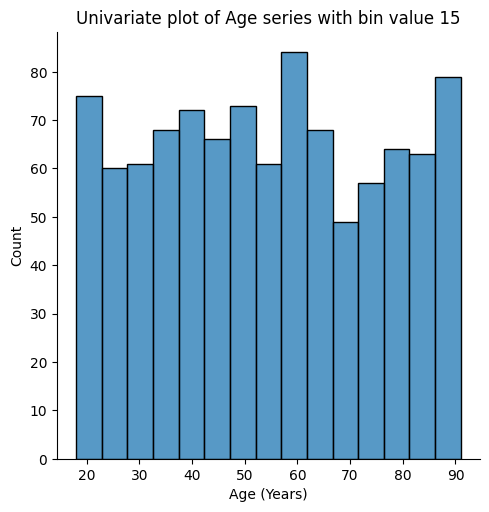

In [9]:
# 2A. Calculating how many bins would be required for bin_width of 5

# Get the Range which is the Highest value minus the Lowest value divided by the bin widgth number

bin_width = 5
lowest_number = int(age_series.min()) #low age number
highest_number = int(age_series.max()) # high age number
range_number = highest_number - lowest_number # range value

bin_value = round(range_number/bin_width) #bin value
print(f" 2a. Bin Value :{bin_value}")

age_data_plot = sns.displot(customer_series, x=age_series, bins=bin_value).set(title='Univariate plot of Age series with bin value 15')
#plt.title("Univariate plot of Age series with bin value {bin_value}")

# 2b. Logic
To fix the dependents data errors, 

I got my dependant rows

I investigated the empty/null rows

I got the mode of the dependant column using the mode() function and replacing the empty fields

I replaced the null values with the dependant mode 

I made the univariate plot and stored it in a variable name

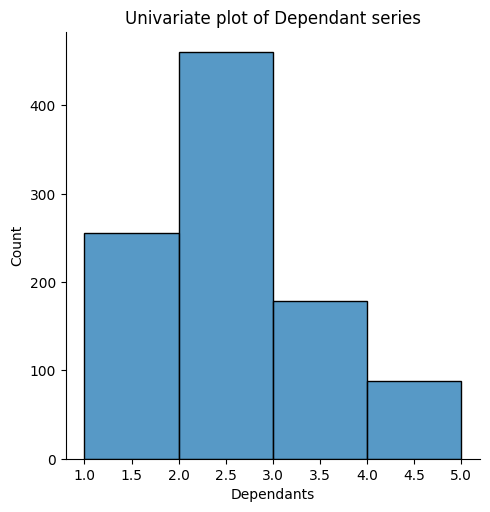

In [10]:
#EX 2B Dependents, fixing data errors with seaborn itself. 

# I fixed the empty rows by replacing the empty dependant rows with the mode

dependant_data = customer_series['Dependants'] # getting the dependant row

#print(dependant_mode) # checking what the mode is
#print(dependant_data.isnull().sum()) # the total number of the values to be fixed
#print(dependant_data.value_counts()) # value of uniqe figures in my dependant column

dependant_mode = dependant_data.mode() # getting the dependant mode

#fixing the dependant row
dependant_fix = dependant_data.fillna(dependant_data.mode())

#ploting the univariate
dependant_data_plot = sns.displot(customer_series, x=dependant_fix, bins=4 ).set(title='Univariate plot of Dependant series')

# 2c.  Logic
I got the customer marital status data series

I made a Univariate plot of Age conditioned with Martial Status using hue 

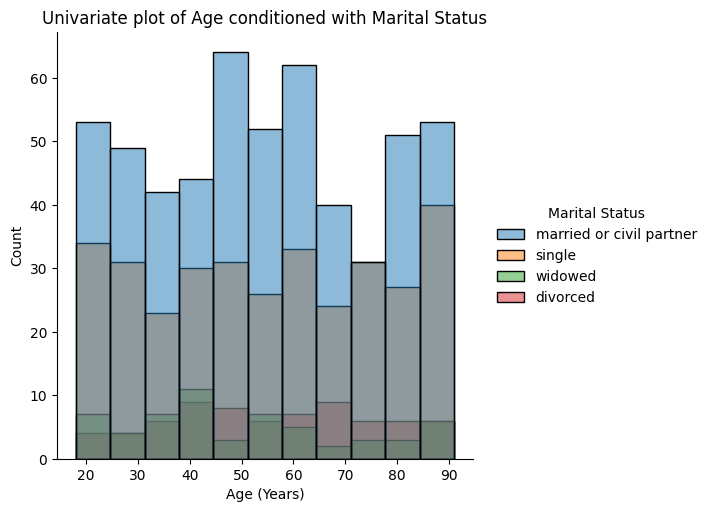

In [11]:
#EX 2c Age (of default bins), conditioned on Marital Status 

marital_status = customer_series['Marital Status']

age_conditioned_plot = sns.displot(customer_series, x=age_series, hue= marital_status ).set(title='Univariate plot of Age conditioned with Marital Status')

# 3. Perform multivariate plots with the following data attributes: 
a. Commuted distance against salary. 
b. Age against Salary 
c. Age against Salary conditioned by Dependants

# 3a. Logic
I got the commute_distance data series

I made a multivariate plot against salary using relplot

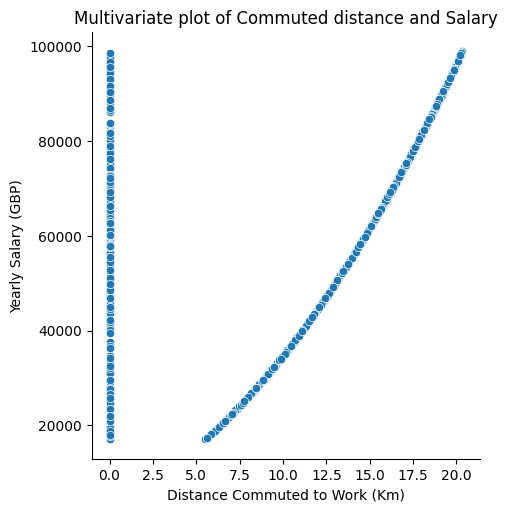

In [12]:
#EX 3A. Commuted distance against salary

commute_distance = customer_series['Distance Commuted to Work (Km)']

distance_salary_mplot = sns.relplot(data=customer_series, x=commute_distance, y=salary_series ).set(title='Multivariate plot of Commuted distance and Salary')

# 3b.  Logic
I got the Age data series.

I made a multivariate plot against the salary using relplot

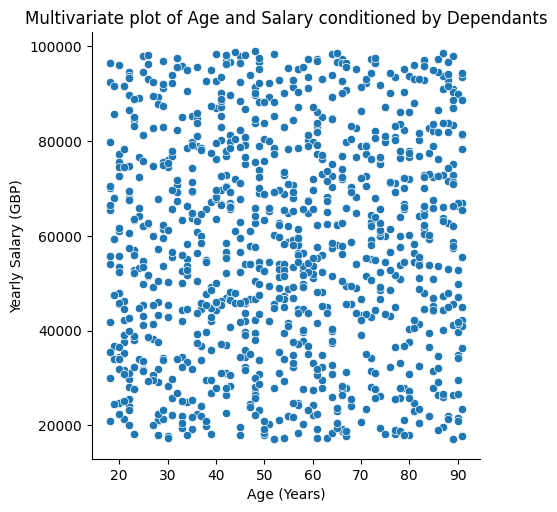

In [13]:
#EX 3B. Age against Salary

age_salary_mplot = sns.relplot(data=customer_series, x=age_series, y=salary_series ).set(title='Multivariate plot of Age and Salary conditioned by Dependants')

# 3c.  Logic
I got the Age data series and the Salary series.

I made a multivariate plot between Age and Salary and conditioned it with my Dependants_data series following the question using relplot

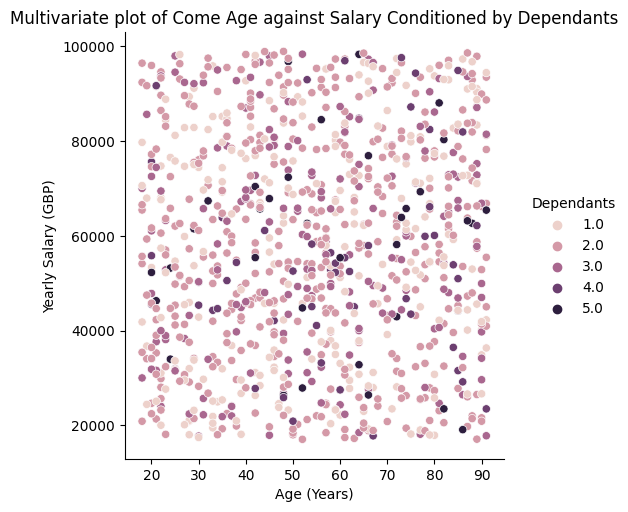

In [14]:
#EX 3C. Age against Salary conditioned by Dependants

age_salary_conditioned_mplot = sns.relplot(data=customer_series, x=age_series, y=salary_series, hue = dependant_data).set(title='Multivariate plot of Come Age against Salary Conditioned by Dependants')
#age_salary_conditioned_mplot = sns.relplot(data=customer_data, x=age_series, y=salary_series, hue = dependant_fix).set(title='Multivariate plot of Come Age against Salary Conditioned by fixed Dependants')

# Exercise 4
Your client would like the ability to save the plots which you have produced. Provide  a Notebook cell which can do this. 

# 4  Logic
I made a plot list to hold all the plots

I wrote a function to save the plot and a loop to itereate over the items in the plotlist and save them 


In [15]:
#EX 4 Saving the plots image for all the plots

# Putting the plots in a dictionary 

plots = {}

plots["./age_data_plot.png"] = age_data_plot
plots["./dependant_data_plot.png"] = dependant_data_plot
plots["./age_conditioned_plot.png"] = age_conditioned_plot
plots["./distance_salary_mplot.png"] = distance_salary_mplot
plots["./age_salary_mplot.png"] = age_salary_mplot
plots["./age_salary_conditioned_mplot.png"] = age_salary_conditioned_mplot


# Function plotSave to save the plots in my plots dictionary 

def plotSave(plot_name, plot_image):
    plot_image.figure.savefig(plot_name)
    
#for loop to iterate over the plots in my dictionary 

for plot, plot_figure in plots.items():
    plotSave(plot, plot_figure)
    